In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import glob
import sys

sys.path.append("../")
from simulate import gen_bursts, run_search
from plotting import set_size

%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
def gauss(x, S, mu, sigma):
    """
    Gaussian function with area S
    Args:
        x: input array to evaluate the function
        S: Area of the gaussian
        mu: mean of the gaussian
        sigma: sigma of the gaussian
    Returns:
    """
    vals = (S / (np.sqrt(2 * np.pi) * sigma)) * np.exp(
        -(1 / 2) * ((x - mu) / sigma) ** 2
    )
    vals[fs < int(mu - 6 * sigma)] = np.nan
    vals[fs > int(mu + 6 * sigma)] = np.nan

    #     vals[vals < S*1e-4] = np.nan
    return vals

<IPython.core.display.Javascript object>

Simulate bursts

In [3]:
np.random.seed(1996)
bursts, name = gen_bursts(
    mu_params=[800, 2000],
    sigma_params=[50, 100],
    mu_dist="uniform",
    sigma_dist="uniform",
    N=10000,
    alpha=-1.8,
    E_min_log=36.5,
    E_max_log=38.5,
    save=False,
)

<IPython.core.display.Javascript object>

In [4]:
fstart = 1000  # MHz
fend = 1800  # MHz
fluence_threshold = 0.0216  # Jy ms # Arecibo

<IPython.core.display.Javascript object>

Run search to obtain a sample of detected bursts and their properties

In [5]:
detected, detected_in_band_df, Es = run_search(
    bursts,
    fstart=fstart,
    fend=fend,
    fluence_threshold=fluence_threshold,
    in_band_sig=2,
    ret="all",
    distance=972,
)

<IPython.core.display.Javascript object>

In [6]:
bursts["det"] = False
bursts.det[detected.index] = True

/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<IPython.core.display.Javascript object>

Plot 200 randomly chosen spectra

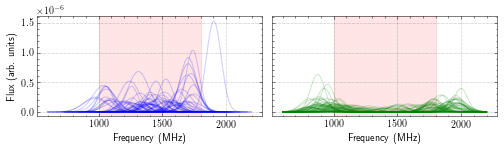

<IPython.core.display.Javascript object>

In [8]:
# freq range to plot
fs = np.linspace(fstart - 400, fend + 400, 100)
with plt.style.context(["science", "grid"]):  # , "no-latex"]):
    fig, axes = plt.subplots(
        1,
        2,
        sharey=True,
        sharex=True,
        figsize=set_size(width="full", subplots=(1, 2)),
    )
    alpha = 0.2
    for i, row in bursts.sample(n=200, random_state=900).iterrows():
        S = row["in_S"]
        mu = row["in_mu_f"]
        sig = row["in_sig_f"]
        det = row["det"]
        if det:
            c = "b"
            axes[0].plot(fs, gauss(fs, S, mu, sig), c=c, alpha=alpha)
        else:
            c = "g"
            axes[1].plot(fs, gauss(fs, S, mu, sig), c=c, alpha=alpha)
    # axes[1].set_ylim(axes[0].get_ylim())
    axes[0].axvspan(fstart, fend, alpha=0.1, color="red")
    axes[0].set_ylabel("Flux (arb. units)")
    axes[0].set_xlabel("Frequency (MHz)")
    axes[1].axvspan(fstart, fend, alpha=0.1, color="red")
    axes[1].set_xlabel("Frequency (MHz)")
    plt.tight_layout()
    plt.savefig("spectra_vis.pdf", bbox_inches="tight", dpi=300)